***SHEET 2***


CARLOS FAROUK ABDALÁ RINCÓN

TOMAS CANDEO MONTOYA

GABRIEL DAVID JIMÉNEZ MOSQUERA

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests as rq
from itertools import combinations

C:\Users\Carlos Abdala\AppData\Local\Temp\ipykernel_23664\1843613820.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# EXERCISE 1

## EXERCISE 1.1

Para asegurar que las matrices de correlación y de covarianza sean exactamente iguales, debemos de estandarizar los datos, esto lo harempos dividiendo cada dato en la desviación estándar de su variable, por ejemplo, dividir cualquier dato de la columna Xi en la desviación estándar de la columna Xi.a


$$ Correlación = \frac{\text{cov}(X, Y)}{\sigma_X \cdot \sigma_Y} $$

Esta es la formula de correlación de Pearson.

Al estandarizar los valores, las desviaciones etandar de las nuevas columnas nos daran 1, lo cual cancelará estos valores de la operación, dandonos que la correlación y la covarianza son exactamente iguales. 

Es importante tener en cuenta que al estandarizar no estamos cambiando la información que poseen los datos, lo que estamos haciendo es cambiar la forma en la que esta es representada, por lo que la información seguira representando lo mismo.

Esto ayuda a mejorar de cierta manera la forma en la que se pueden comparar las relaciones entre variables en algunos casos.

## EXERCISE 1.2

### 1.2.a

In [3]:
matrix = np.array([[92,80], [60, 30], [100, 70]])
mean_matrix = np.mean(matrix, axis=0)
central_matrix = matrix - mean_matrix
transpose_cental_matrix = central_matrix.T
dot_product = np.dot(transpose_cental_matrix, central_matrix)
covariance_matrix = dot_product / (matrix.shape[0])
print(covariance_matrix)

cov_matrix = np.cov(matrix, rowvar=False, bias=True)
print(cov_matrix)

[[298.66666667 346.66666667]
 [346.66666667 466.66666667]]
[[298.66666667 346.66666667]
 [346.66666667 466.66666667]]


In [4]:
# matrix without function

D = np.array([[10, 12], [7, 8], [5, 4]])
D_covariance = np.cov(D, rowvar=False, bias=True)
print("Covariation matrix without transformation \n", D_covariance)

# matrix with function
def transformation (x):
    return 6*x + 3
function = np.vectorize(transformation)
trans_D = function(D)    
trans_D_covariance = np.cov(trans_D, rowvar=False, bias=True)
print("\n Covariation of transformed matrix  \n", trans_D_covariance)

Covariation matrix without transformation 
 [[ 4.22222222  6.66666667]
 [ 6.66666667 10.66666667]]

 Covariation of transformed matrix  
 [[152. 240.]
 [240. 384.]]


### 1.2.b

### media
Para demostrar que la media de la matris transformada es igual a la media de la matriz transformada aplicando la tranformacion vamos a dentorar los siguientes datos 

media-tranformada ---> media de la matriz transformada  
D-transformada -----> matriz D con la transformación  
a -----> el valor que multiplica el elemento en Xi en la funcion afin   
b -----> el valor que suma en la función afin   
D ----> matriz original  
media ----> media de la mtriz sin traansformar  
n ----> número total de datos   

Una vez definido esto utilizamos la ecuación de la media en una matriz la cual esta dada por: 
$$ ecuación 1: media = \frac{1}{n} \sum_{i=1}^{n} D $$

Ahora la ecuación para obtener la matriz tranforada es la siguiente:  
$$ ecuación 2: D-transformada = a*D + b $$

por lo tanto la media de la matriz tranformada, reemplazando valores seria la siguiente
$$ media-tranfrormada = \frac{1}{n} \sum_{i=1}^{n} D transformada $$
$$ media-tranfrormada = \frac{1}{n} \sum_{i=1}^{n} (a*D + b) $$
$$ media-tranfrormada = a* \frac{1}{n} \sum_{i=1}^{n} D + b $$
$$ media-tranfrormada = a*media + b $$

Como se puede ver al reemplazar la matriz tranformada por la ecuación que la genera, en la sumatoria se aplica la tranfromación a cada valor, sin embargo al ser constantes estos pueden salir de la sumatario denjando unicamente la sumatoria de los datos de la matriz original, ecuación que es igual a la de la media 

### Covarianza

Una vez demostrada la media ahora veremos la covarianza, en este caso la covarianza esta determinada por:
$$ ecuación 3 :covarianza = \frac{1}{n} \sum_{i=1}^{n} (D_i-media_i)(D_j-media_j) $$
Para la matriz tranformada aplicamos la misma logica que en la maedia donde la ecuación 3 se aplica en base a la matriz tranformada y luego el valor de la matriz tranformada sera reemplazada por la ecuación 2
$$ covarianzaTranformada = \frac{1}{n} \sum_{i=1}^{n} (DTranformada_i-mediaTransformada_i)(DTranformada_j-mediaTranformada_j) $$
$$ covarianzaTranformada = \frac{1}{n} \sum_{i=1}^{n} ((a_i*D_i + b_i)-(a_i*media_i + b_i))((a_j*D_j + b_j)-(a_j*media_j + b_j)) $$
Si resolvemos los parentesis y simplificamos obtenedremos la siguiente expresión donde los valores de b se van a cancelar
$$ covarianzaTranformada = \frac{1}{n} \sum_{i=1}^{n} a_i*a_j(D_i - media_i)(D_j - media_j) $$
Sacamos los valores de a de la sumatoria y reemplazamos la sumatoria por la ecuación 3
$$ covarianzaTranformada = a_i*a_j*covarianza $$



### 1.2.C

### corelación

Para demostrar que la correlación en ambas matrices es igual partimos de la ecuación de corelación

$$ecuación 1: correlación = \frac{covarianza_ij}{\sqrt{varianza_i*varianza_j}}$$

Recordemos que la ecuación de la varianza para la mariz transformada
$$ecuación 2: covarianzaTranformada = a_i*a_j*covarianza $$

ahora usaremos la ecuación 1 aplicada a la matriz transformada
$$correlaciónTransformada = \frac{covarianza_ijTransformada}{\sqrt{varianza_iTransformada*varianza_jTransformada}}$$

reemplazamos los valores de la covarianza transformada por la ecuación 2 y simplificamos
$$correlaciónTransformada = \frac{a_i*a_j*covarianza}{\sqrt{a_i*a_j*covarianza_i* a_i*a_j*covarianza_j}}$$
$$correlaciónTransformada = \frac{a_i*a_j*covarianza}{\sqrt{a_i^2*a_j^2*covarianza_i*covarianza_j}}$$
$$correlaciónTransformada = \frac{a_i*a_j*covarianza_ij}{a_i*a_j\sqrt{acovarianza_i*covarianza_j}}$$
$$correlaciónTransformada = \frac{covarianza_ij}{\sqrt{acovarianza_i*covarianza_j}}$$

Como podemos ver la ecuación de la correlación trasformada es igual a la ecuación 1 que es la correlación sin transformar

la propiedad representa que las correlaciones de ambas matrices no cambian, esto ya que sin importar que en una se realizo una transformación afin, este tipo de transformaciones realiza una tranformación lineal y una traslación pero esto no afecta su comportamiento lineal por lo que este sera el mismo con este tipo de transformaciones

EXERCISE 2

EXERCISE 2.1

In [31]:
def getStats(A):
    n = len(A) 
    m = len(A[0]) 

    mean = [sum(col) / n for col in zip(*A)]

    central_A = [[A[i][j] - mean[j] for j in range(m)] for i in range(n)]
    central_A2=np.array(central_A)

    cov = np.dot(central_A2.T, central_A2) / n

    stds= np.sqrt(np.var(A, axis=0, ddof=1))
    corr = np.divide(cov, stds * stds[:, np.newaxis])

    return mean, cov, corr


import numpy as np 
A = [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]

A_np = np.array(A) 

mean, cov, corr = getStats(A)
print("Mean \n", mean)
print("Covariance matrix \n", cov)
print("Correlation matrix \n", corr)



Mean 
 [4.0, 5.0, 6.0]
Covariance matrix 
 [[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]]
Correlation matrix 
 [[0.66666667 0.66666667 0.66666667]
 [0.66666667 0.66666667 0.66666667]
 [0.66666667 0.66666667 0.66666667]]


## Exercise 2.1


In [32]:
## unit-tests for getStats and getEigen
import warnings
dfIrisTest = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
AIris = dfIrisTest.values[:,0:4].astype(float)
def testStats(expected, A):
    out = getStats(A)
    if type(out) != tuple or len(out) != 3:
        warnings.warn("getStats not working properly! Output of getStats should be a tuple of length 3!")
        return
    mu, cov, cor = out
    print("mu:", "OK" if np.array_equal(np.round(expected[0], 3), np.round(mu, 3)) else "FAIL")
    print("cov:", "OK" if np.array_equal(np.round(expected[1], 3), np.round(cov, 3)) else "FAIL")
    print("cor:", "OK" if np.array_equal(np.round(expected[2], 3), np.round(cor, 3)) else "FAIL")

covIris = np.array([[ 0.681, -0.039, 1.265, 0.513], [-0.039, 0.187, -0.32, -0.117], [1.265, -0.32, 3.092, 1.288], [0.513, -0.117,  1.288,  0.579]])
testStats(([5.843, 3.054, 3.759, 1.199], covIris, np.array([[ 1., -0.109, 0.872, 0.818], [-0.109,  1., -0.421, -0.357], [0.872, -0.421, 1., 0.963], [0.818, -0.357, 0.963,  1.]])), AIris)

mu: OK
cov: OK
cor: FAIL


# Exercise 2.2

# Exercise 2.3

In [8]:
def drawPrincipalDirections(D,label_x,lable_y):
    #a
    mean_of_xi=sum(D[:,0])/len(D[:,0])
    mean_of_xj=sum(D[:,1])/len(D[:,1])
    cen_xi=D[:,0]-mean_of_xi
    cen_xj=D[:,1]-mean_of_xj
    cov_matrix= np.zeros((2,2))
    cov_matrix[0,0]= sum(cen_xi*cen_xi)
    cov_matrix[0,1]= sum(cen_xi*cen_xj)
    cov_matrix[1,0]= sum(cen_xj*cen_xi)
    cov_matrix[1,1]= sum(cen_xj*cen_xj)
    cov_matrix=cov_matrix/len(D[:,0])
    print('Covariance Matrix: \n', cov_matrix)

    #b
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    print("\nEigenvalues: \n",eigenvalues,"\n\nEigenvectors: \n", eigenvectors)

    #c
    plt.plot()
    plt.scatter(D[:,0],D[:,1])
    plt.scatter(mean_of_xi,mean_of_xj,color="red")
    
    min_xi = min(D[:, 0])
    max_xi = max(D[:, 0])
    lines_x =np.array([min_xi,max_xi])
    slopes=[eigenvectors[0, 0] / eigenvectors[0,1],eigenvectors[1, 0] / eigenvectors[1, 1]]
    plt.xlim(min_xi-1, max_xi+1)
    plt.ylim(min(D[:, 1])-1, max(D[:, 1])+1)
    line1_slope = slopes[0]
    line1_y_intercept = mean_of_xj - (line1_slope * mean_of_xi)
    line1_y = (line1_slope * lines_x) + line1_y_intercept
    plt.plot(lines_x, line1_y, color='green', label="Line 1")
    line2_slope = slopes[1]
    line2_y_intercept = mean_of_xj - (line2_slope * mean_of_xi)
    line2_y = (line2_slope * lines_x) + line2_y_intercept
    plt.plot(lines_x, line2_y, color='green', label="Line 1")
    plt.xlabel(label_x)
    plt.ylabel(lable_y)
    plt.show()

Covariance Matrix: 
 [[ 0.68112222 -0.03900667]
 [-0.03900667  0.18675067]]

Eigenvalues: 
 [0.68418098 0.18369191] 

Eigenvectors: 
 [[ 0.99693955  0.07817635]
 [-0.07817635  0.99693955]]


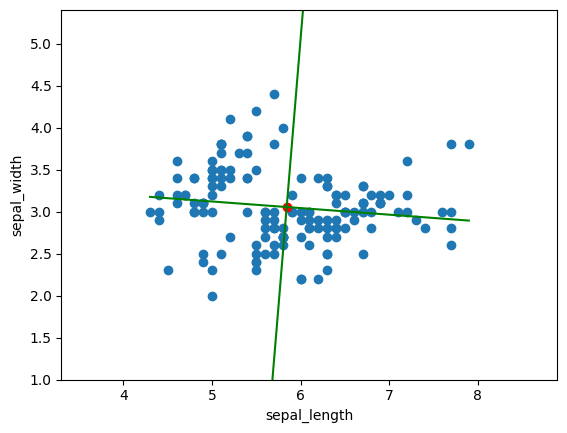

Covariance Matrix: 
 [[0.68112222 1.26519111]
 [1.26519111 3.09242489]]

Eigenvalues: 
 [0.13911693 3.63443018] 

Eigenvectors: 
 [[-0.91920275 -0.39378459]
 [ 0.39378459 -0.91920275]]


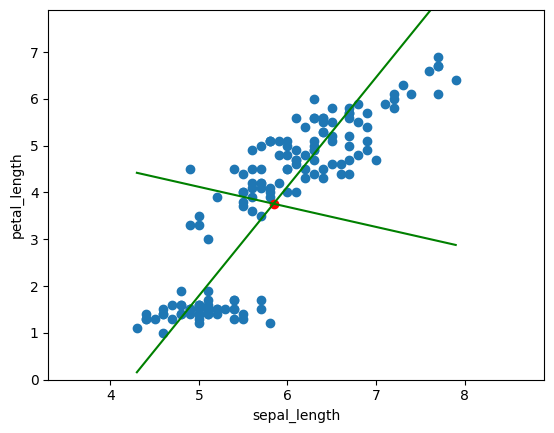

Covariance Matrix: 
 [[0.68112222 0.51345778]
 [0.51345778 0.57853156]]

Eigenvalues: 
 [1.14584055 0.11381323] 

Eigenvectors: 
 [[ 0.7414199  -0.67104138]
 [ 0.67104138  0.7414199 ]]


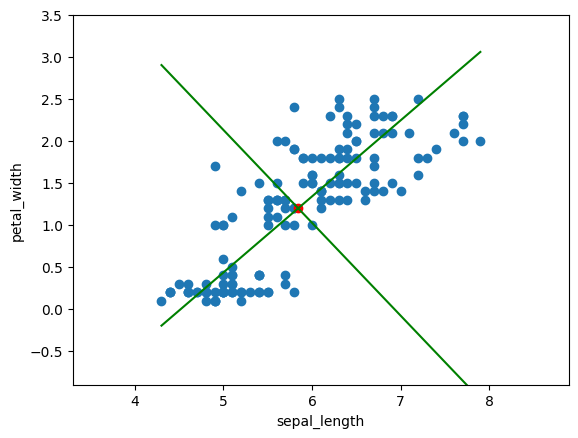

Covariance Matrix: 
 [[ 0.18675067 -0.319568  ]
 [-0.319568    3.09242489]]

Eigenvalues: 
 [0.1520195  3.12715605] 

Eigenvectors: 
 [[-0.99414596  0.10804539]
 [-0.10804539 -0.99414596]]


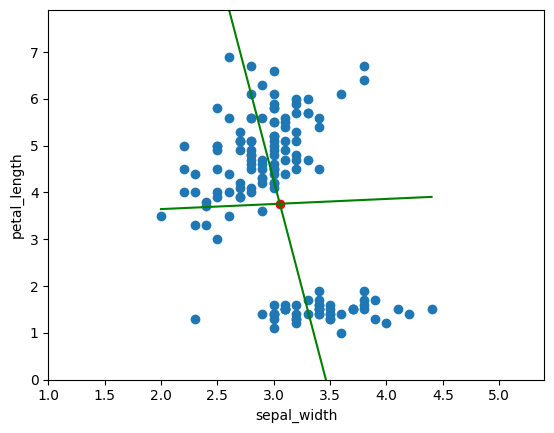

Covariance Matrix: 
 [[ 0.18675067 -0.11719467]
 [-0.11719467  0.57853156]]

Eigenvalues: 
 [0.1543701  0.61091213] 

Eigenvectors: 
 [[-0.963885    0.26631882]
 [-0.26631882 -0.963885  ]]


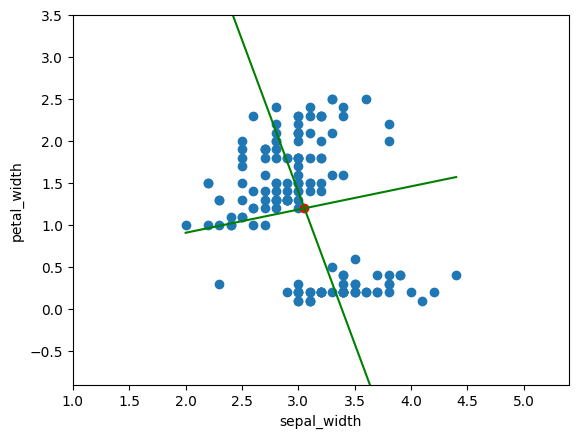

Covariance Matrix: 
 [[3.09242489 1.28774489]
 [1.28774489 0.57853156]]

Eigenvalues: 
 [3.63497866 0.03597779] 

Eigenvectors: 
 [[ 0.92154695 -0.38826694]
 [ 0.38826694  0.92154695]]


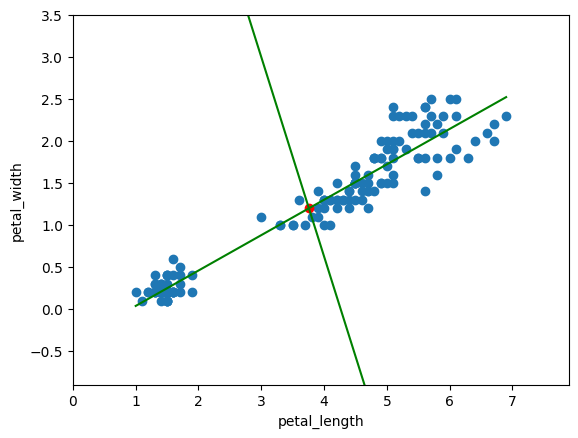

In [9]:
url="https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
path="iris-dataset-downloaded-in-remote.csv"
response=rq.get(url)
with open(path, "wb") as download:
  download.write(response.content)
remote_data=pd.read_csv(path)
combination_list= list(combinations([0,1,2,3],2))

for index in combination_list:
  x=remote_data.columns[index[0]]
  y=remote_data.columns[index[1]]
  drawPrincipalDirections((np.array([remote_data[x],remote_data[y]])).T,x,y)